#### Steps
1. imports
2. Data preprocessing (remove time, standardize amount, keep only normal data from class col)
3. Build autoencoder model
4. Compile and train
5. Precit and mse


In [77]:
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [78]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [79]:
# Remove time

data = data.drop(["Time"], axis = 1)

In [80]:
# standardize amount, as its values are high, it should not make a larger impact on modle

from sklearn.preprocessing import StandardScaler
data["Amount"] = StandardScaler().fit_transform(data["Amount"].values.reshape(-1, 1))

In [81]:
# remove fraud data from train

X_train = data[data["Class"] == 0].drop(["Class"], axis = 1).values
# y_test = [data[["Class"]] if data["Class"] == 1 ]
X_test = data[data["Class"] == 1].drop(["Class"], axis = 1).values

In [82]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras import regularizers

input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape = (input_dim), )
encoder = Dense(encoding_dim, activation = "tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoder = Dense(input_dim, activation = "relu")(encoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)

In [83]:
autoencoder.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [84]:
history = autoencoder.fit(X_train, X_train, epochs = 1, batch_size = 10, shuffle = True, verbose = 1)

28432/28432 [==============================] - 32s 1ms/step - loss: 0.6587 - accuracy: 0.7938


In [85]:
predictions = autoencoder.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [86]:
import numpy as np
mse = np.mean(np.power(X_test - predictions, 2), axis = 1) 
print(mse)
y_test = np.ones(492)
print(y_test)

[3.77105681e+00 1.28582722e+00 4.32943318e+00 1.98322934e+01
 4.20013275e+00 1.44677204e+01 1.37974292e+01 1.08218747e+01
 1.02402542e+01 9.48215738e+00 1.00015898e+01 6.49515584e+00
 9.22945432e+00 9.68623353e+00 1.09165383e+01 1.74480113e+01
 1.71828051e+01 1.31516891e+01 1.29322743e+01 1.26852951e+01
 1.27475290e+01 1.94397505e+01 1.74406210e+01 1.74650473e+01
 9.57978753e+00 6.21036493e+01 1.06932808e+01 5.79256218e+01
 6.21176110e+01 1.14488182e+01 1.96794977e+01 1.95568085e+01
 7.56615833e+00 6.28036502e+01 5.79409468e+01 6.23660074e+01
 6.34819508e+01 6.38544299e+01 7.20829779e+00 4.43894062e-01
 4.87015557e-01 5.79391247e-01 6.43120458e+01 6.10716622e+01
 8.38313232e+01 7.43679081e+01 6.98646631e+01 7.52941143e+01
 7.70700121e+01 7.81566015e+01 7.93314912e+01 8.05952513e+01
 8.19483970e+01 8.33913962e+01 8.49246684e+01 8.65485939e+01
 8.71722986e-01 6.42030093e+01 6.59818700e+01 6.79745219e+01
 4.75216426e-01 7.20709668e+01 7.43700068e+01 7.67538399e+01
 7.92371001e+01 8.181983

In [87]:
error_df = pd.DataFrame({
    "reconstruction_errors": mse,
    "true_class": y_test
})

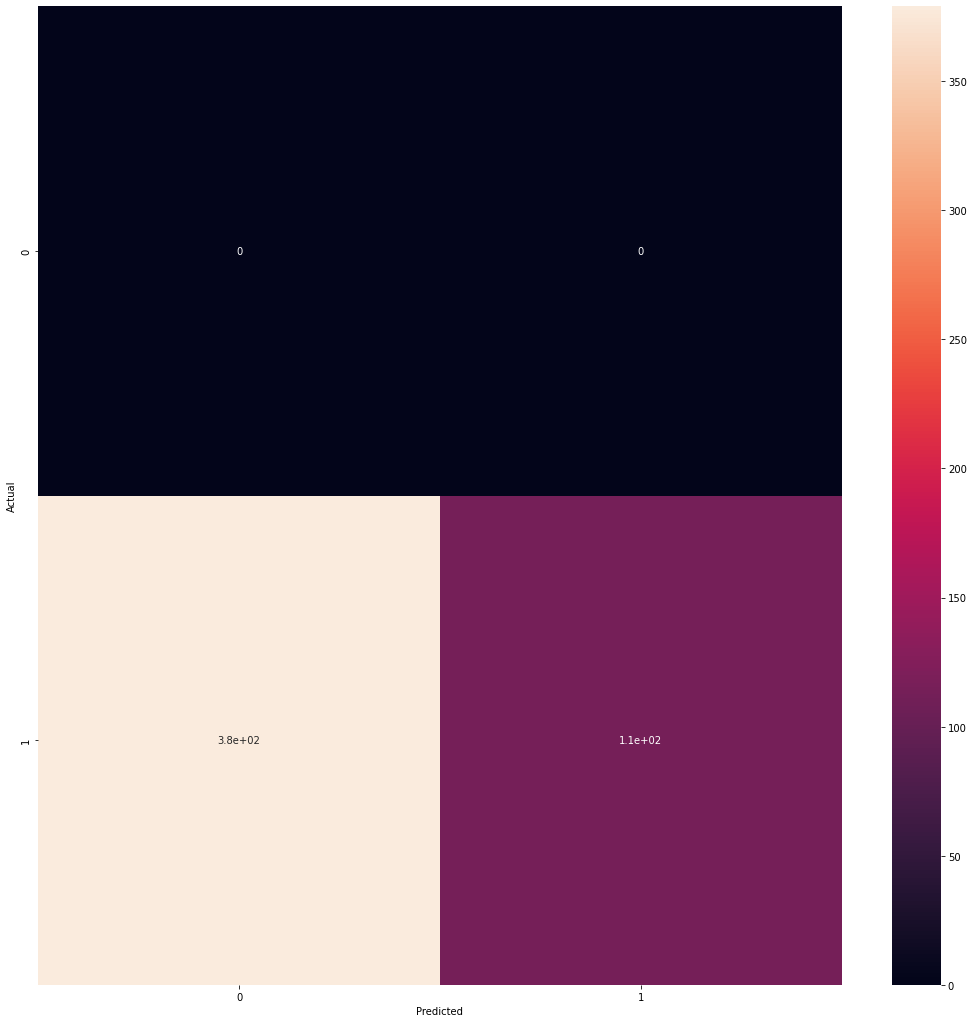

In [90]:
y_pred = [1 if e > 50 else 0 for e in error_df.reconstruction_errors.values]

from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score 
cm = confusion_matrix(error_df.true_class, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 18))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
print("Accuracy:",accuracy_score (error_df['true_class'],y_pred)) 
print(" Recall:",recall_score(error_df['true_class'],y_pred))
print(" Precision:",precision_score(error_df['true_class'],y_pred))

print(y_pred)

Accuracy: 0.22967479674796748
 Recall: 0.22967479674796748
 Precision: 1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 